In [16]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels
rcParams['figure.figsize'] = 8,4


In [5]:
data=pd.read_csv("/content/Arima_dataset.csv")

In [6]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data["Month"]=pd.to_datetime(data["Month"],infer_datetime_format="True")

In [8]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
data=data.set_index(["Month"])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


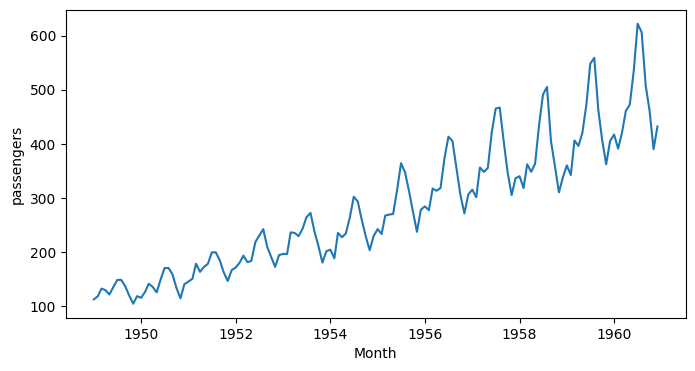

In [10]:
plt.xlabel("Month")
plt.ylabel("passengers")
plt.plot(data)
plt.show()

In [11]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
rolmean.head(22)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


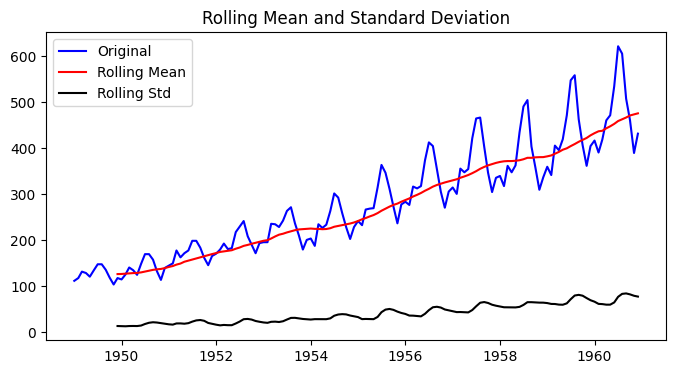

In [12]:
orig = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [21]:
adf = sm.tsa.adfuller(data["#Passengers"])

In [20]:
# # pip install statsmodels
# import statsmodels.api as sm
# from statsmodels.tsa import stattools


In [23]:
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


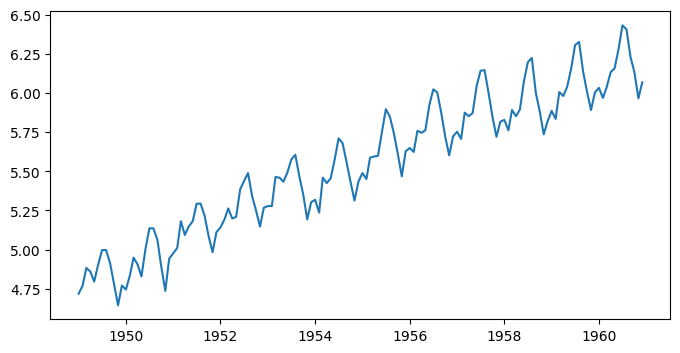

In [28]:
import numpy as np
data1 = np.log(data)
plt.plot(data1)
plt.show()

In [29]:
data1.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [40]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    result = sm.tsa.adfuller(timeseries["#Passengers"])

    # result = adfuller(timeseries['#Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [37]:
d1mean=data1.rolling(window=12).mean()
minus=data1-d1mean
minus.dropna(inplace=True)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


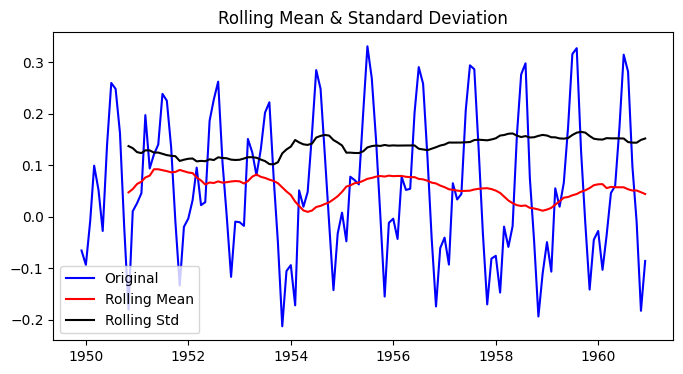

ADF Statistic: -3.1629079913008833
p-value: 0.022234630001242206
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [41]:
get_stationarity(minus)

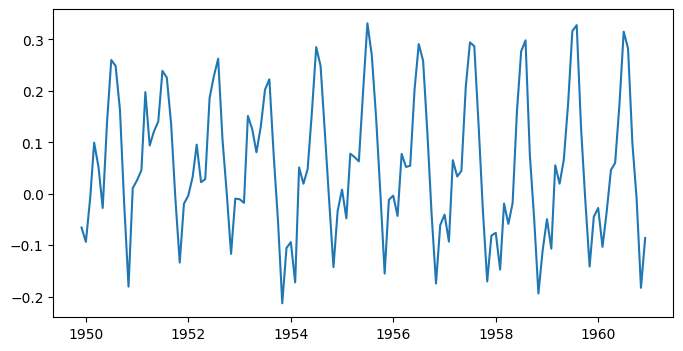

In [42]:
plt.plot(minus)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


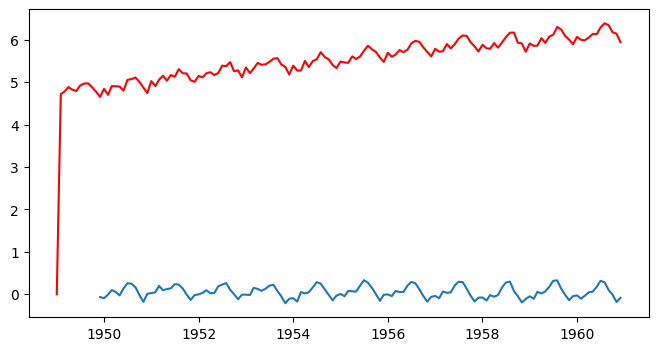

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

decomposition = seasonal_decompose(data1) 
model = ARIMA(data1, order=(2, 1, 2))
results = model.fit()

# minus1 = data1 - results.fittedvalues  # Calculate the residual series

plt.plot(minus)
plt.plot(results.fittedvalues, color='red')

# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA

# decomposition = seasonal_decompose(df_log) 
# model = ARIMA(df_log, order=(2,1,2))
# results = model.fit(disp=-1)
# plt.plot(df_log_minus_mean)
# plt.plot(results.fittedvalues, color='red')


In [61]:

!pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


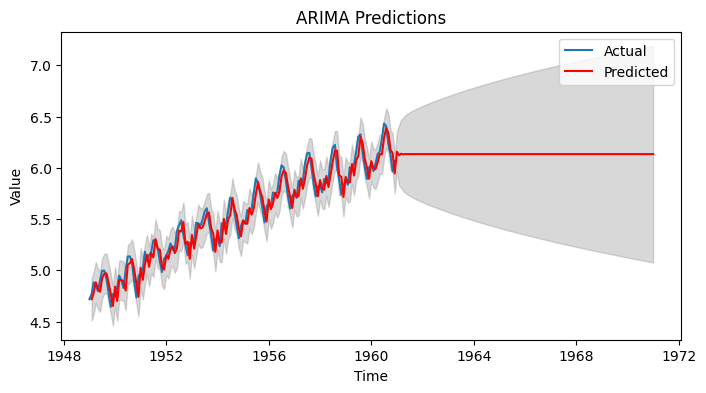

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model and obtain the results
model = ARIMA(data1, order=(2, 1, 2))
results = model.fit()

# Get the predicted values
pred = results.get_prediction(start=1, end=264)

# Extract the predicted mean values and confidence intervals
pred_mean = pred.predicted_mean
confidence_int = pred.conf_int()

# Plot the actual data and predicted values
plt.plot(data1)
plt.plot(pred_mean, color='red')

# Fill the area between the confidence intervals
plt.fill_between(confidence_int.index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='gray', alpha=0.3)

# Customize the plot if needed
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Predictions')
plt.legend(['Actual', 'Predicted'])

plt.show()
